# Overview

This is the last week and our goal today is to use what we have learned so far to analyze new data: the tweets of the members of the House of Representatives. 

Remember that the Wikipedia network showed a nuanced and complex picture of the various kinds of connections between politicians that arise from the political system. And how our text-analysis also showed evidence of the many small cases and issues that fill the days of real-world American politicians.

Well, as we all know *nuance is sometimes a little bit boring*, so today, we're going to a place without much such nuance. **Twitter**. Twitter has become one of the main communication channels between politicians and the electorate, and we hope you'll find that the things that are going on on Twitter will fit your prejudices better ... it will have a lot less nuance. 

We will also learn about *sentiment analysis*, a topic which is pretty useless when it comes to Wikipedia (because all Wikipedia text is designed to be neutral), but which is highly useful to analyze Twitter data (and many other things).

The overview for today is:

* Analyze and visualize the retweets network of the members of the House.
* Learn about sentiment analysis.
* Analyze the text of the tweets (using TF-IDF and sentiment analysis).

# Part 1 - The network of retweets.

**Data**. In terms of data, we grabbed 200 recent tweets from each member [here](https://github.com/suneman/socialgraphs2019/tree/master/files/data_twitter/tweets_2019.zip); files is named as the Twitter handle of a member, and each line of a file contains the tweet text (from the most recent to the oldest). By 'handle' we mean a user's id on Twitter. You can find the Twitter handles of the members of the house [here](https://github.com/suneman/socialgraphs2019/blob/master/files/data_twitter/H115_tw_2019.csv). (If you're interested in trying to get the data yourself through the Twitter API, check out the appendix at the bottom of the page for helpful hints.)


**Retweets**. Retweets are re-posting of Tweets that were often originated by another user. Often, they indicate trust in the message included in the original Tweet and in the original author, and agreement with the message contents ([as found also by scientific studies](http://www.aaai.org/ocs/index.php/ICWSM/ICWSM15/paper/download/10555/10467)). This suggests that, by looking at how representatives retweet each other, we can understand something about the relations between them.

_Exercise_ 1: Build the network of retweets.
We will now build a network that has as nodes the Twitter handles of the members of the house, and direct edges between nodes A and B if A has retweeted content posted by B. We will build a weighted network, where the weight of an edge is equal to the number of retweets. You can build the network following the steps below (and you should  be able to reuse many of the functions you wrote in previous weeks):

> * Consider the 200 tweets written by each member of the house (see **Data** above). For each file, use a regular expression to find retweets and to extract the Twitter handle of the user whose content was retweeted. All retweets begin with "*RT @originalAuthor:*", where "*originalAuthor*" is the handle of the user whose content was retweeted (and the part of the text you want to extract).
> * For each retweet, check if the handle retweeted is the one of a member of the house. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Use weighted edges to account for multiple retweets. Store also the party of each member as a node attribute (use the data in [this file](https://github.com/suneman/socialgraphs2019/blob/master/files/data_twitter/H115_tw_2019.csv), or the data you downloaded in Part 1). Remove self-loops (edges that connect a node with itself).


 _Exercise_ 2: Visualize the network of retweets and investigate differences between the parties.
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and nodes coordinates from the force atlas algorithm (see Week 5). *Hint: use the undirected version of the graph to find the nodes positions for better results, but stick to the directed version for all measurements.* Plot nodes in colors according to their party (e.g. 'red' for republicans and 'blue' for democrats) and set the nodes' size proportional to their total degree. 
>   * Compare the network of Retweets with the network of Wikipedia pages (Week 5). Do you observe any difference? How do you explain them?
> * Now set the nodes' size proportional to their betweenness centrality. What do you observe?
> * Repeat the point above using eigenvector centrality instead. Is there any difference? Can you explain why?
> * Who are the three nodes with highest degree within each party? And eigenvector centrality? And betweenness centrality?
> * Plot on the same figure the distribution of outgoing strength for the republican and democratic nodes (e.g. the sum of the weight on outgoing links). Which party is more active in retweeting other members of the house?
> * Find the 3 members of the republican party that have been retweeted more often tweets from democratic members. Repeat the measure for the democratic members. Can you explain your results by looking at the Wikipedia pages of these members of the house?

 _Exercise_ 3: Community detection.
> * Use the Louvain-algorithm (for details see last week) to find communities in the full house of representatives Twitter-network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found for the Wikipedia network? Comment on your result.
> * Visualize the network, using the Force Atlas algorithm. This time assign each node a different color based on their _community_. Describe the structure you observe.
> * Compare the communities found by your algorithm with the parties by creating a matrix $\mathbf{D}$ with dimension $(B \times C$, where $B$ is the number of parties and $C$ is the number of communities. We set entry $D(i,j)$ to be the number of nodes that party $i$ has in common with community $j$. As we discussed last week, the matrix $\mathbf{D}$ is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). 
> * Use the confusion matrix to explain how well the communities you've detected correspond to the parties. Consider the following questions
>   * Are there any republicans grouped with democrats (and vice versa)?
>   * Does the community detection algorithm sub-divide the parties? Do you know anything about American politics that could explain such sub-divisions? Answer in your own words.

# Part 2 - What do republican and democratic members tweet about?

We will now put to use all we have learned on language processing to find out the content of the tweets of democratic and republican members. 

*Exercise* 4: TF-IDF of the republican and democratic tweets.
> We will create two documents, one containing the words extracted from tweets of republican members, and the other for Democratic members. We will then use TF-IDF to compare the content of these two documents and create a word-cloud. The procedure you should use is exactly the same you used in exercise 2 of week 7. The main steps are summarized below: 
> * Create two large documents, one for the democratic and one for the republican party. Tokenize the pages, and combine the tokens into one long list including all the pages of the members of the same party. 
>   * Exclude the twitter handles of other members.
>   * Exclude punctuation.
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * Compute the TF-IDF for each document.
> * Now, create word-cloud for each party. Are these topics less "boring" than the wikipedia topics? Why?  Comment on the results.

# Part 3 - Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Twitter data. Experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



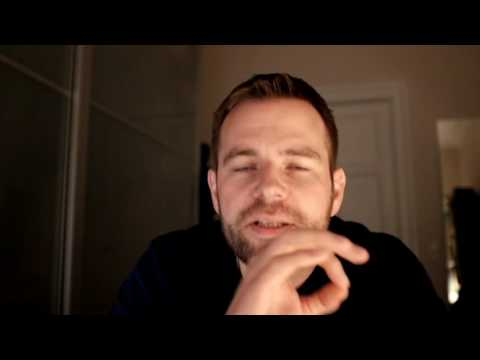

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


> _Exercise_ 5: Sentiment over the Twitter data.
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Create two lists: one including tweets by democratic members, and the other including tweets of republican members. Calculate the sentiment of each tweet and plot the distribution of sentiment for the two lists. Are there significant differences between the two? Which party post more positive tweets?
> * Compute the average $m$ and standard deviation $\sigma$  of the Tweets sentiment (considering tweets by both republican and democrats). 
> * Now only tweets with sentiment lower than $m-2\sigma$. We will refer to them as _negative_ tweets.  Build a list containing _negative_ tweets written by democrats, and one for republicans. Compute the TF-IDF on these two lists. Create a word-cloud for each of them. Are there differences between the positive content posted by republican and democrats?
> * Repeat the point above, but considering _positive_ tweets (e.g. with sentiment larger than $m+2\sigma$). Comment on your results.


# Appendix

You can also download fresh data by using the Twitter API to download the 200 most recent tweets of the members of the House of Representatives. 

Follow the steps below for success.

_Exercise_ A: Download Twitter Data.
> To get access to the Twitter API, you will need to create an app. You can follow these steps:
>
> * Create a Twitter account (you can use your one if you already have one).
> * Apply for a Twitter developer account [here](https://developer.twitter.com/en/apply-for-access.html)
> * Create an app that interacts with the Twitter API. Go to https://developer.twitter.com/en/apps and click _"Create an app"_.
> * Fill out the form, agree to the terms, and click _“Create”_. **Note: you can use the link to your Twitter page as "_Website URL_" (e.g. ht<span>tps://</span>twitter.com/my_twitter_handle)**.
> * In the next page, click on _Keys and Access Tokens_ tab, and copy your _API key_ and _API secret_. Scroll down and click _Create my access token_, and copy your _Access token_ and _Access token secret_.

> We are almost set to use the Twitter API! We will use a Python library called [python-twitter](https://github.com/bear/python-twitter) to connect to Twitter API and download data. There are [many other libraries](https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries.html) that let you use Twitter API. We chose python-twitter because it is simple to use (and it fully supports the Twitter API).
> * Install python-twitter using one of the following: 
>    * `conda install -c jacksongs python-twitter` 
>    * `pip install python-twitter`
> * Check out python-twitter [documentation](https://python-twitter.readthedocs.io/en/latest/getting_started.html) and [examples](https://github.com/bear/python-twitter/tree/master/examples) to get started with the API. Use the API keys and tokens for the app you created above to create an instance of the [`twitter.Api`](https://python-twitter.readthedocs.io/en/latest/twitter.html#twitter.api.Api) class.
> * Download the twitter handles of the members of the list [_u-s-representatives_](https://twitter.com/cspan/lists/u-s-representatives/members?lang=en). This list contains the handles of the current members of the house of representatives. _Hint:_ Use the method [`twitter.api.Api.GetListMembers`](https://python-twitter.readthedocs.io/en/latest/twitter.html?highlight=getlistmembers#twitter.api.Api.GetListMembers). 
> *  Retrieve the _screen name_ associated to each Twitter handle (the screen name is the one displayed in a user's Twitter page under the profile picture in bold). _Hint:_ Use the method [`twitter.api.Api.UsersLookup`](https://python-twitter.readthedocs.io/en/latest/twitter.html?highlight=getlistmembers#twitter.api.Api.UsersLookup).
> * Tricky bit! Find the party associated to each Twitter handle using the [list of the house of representatives members on Wikipedia](https://github.com/suneman/socialgraphs2019/blob/master/files/data_US_congress/H115.csv). What you need to do is to match _screen names_ with the Wikipedia page names. Be creative to find a solution! _Note:_ Some members don't have a Twitter account, but others have two. In the latter case, prefer the account that is related to the house of representatives (e.g. prefer https://twitter.com/RepRoKhanna over https://twitter.com/rokhanna). Create a `pandas.Dataframe` with twitter handles and corresponding parties and save it.
> * Download the 200 most recent Tweets for each member of the house. Save the tweets of each member in a different file. _Hint:_ Use the method [`twitter.api.Api.GetUserTimeline`](https://python-twitter.readthedocs.io/en/latest/twitter.html?highlight=getlistmembers#twitter.api.Api.GetUserTimeline).